# Análise geral do dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bank_train.csv")

Avaliando inicialmente o dataset para ter informações gerais


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40000 non-null  int64  
 1   age        38801 non-null  float64
 2   job        38651 non-null  object 
 3   marital    39903 non-null  object 
 4   education  40000 non-null  object 
 5   location   18498 non-null  object 
 6   default    40000 non-null  object 
 7   balance    38208 non-null  float64
 8   housing    40000 non-null  object 
 9   loan       40000 non-null  object 
 10  contact    39266 non-null  object 
 11  day        40000 non-null  int64  
 12  month      40000 non-null  object 
 13  duration   40000 non-null  int64  
 14  campaign   38603 non-null  float64
 15  pdays      40000 non-null  int64  
 16  previous   39703 non-null  float64
 17  poutcome   40000 non-null  object 
 18  y          40000 non-null  object 
dtypes: float64(4), int64(4), object(11)
memory usa

Verificando quantos dados vazios (NaN) temos de cada tipo


In [3]:
df.isna().sum()

id               0
age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [2]:
df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [113]:
df.describe().round(2)


,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00,38801.00,38208.00,40000.00,40000.00,38603.00,40000.00,39703.00
mean,19999.50,40.96,1364.65,15.82,380.42,2.75,40.36,0.58
std,11547.15,11.03,3059.02,8.33,3044.41,3.04,100.29,2.34
min,0.00,8.00,-8019.00,1.00,-20.00,1.00,-1.00,0.00
25%,9999.75,33.00,73.00,8.00,102.00,1.00,-1.00,0.00
50%,19999.50,39.00,450.50,16.00,180.00,2.00,-1.00,0.00
75%,29999.25,48.00,1423.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,150.00,102127.00,31.00,75000.00,58.00,871.00,275.00


In [114]:
df.describe(include=['object'])

,job,marital,education,location,default,housing,loan,contact,month,poutcome,y
count,38651,39903,40000,18498,40000,40000,40000,39266,40000,40000,40000
unique,13,3,4,6,2,2,4,3,12,4,2
top,blue-collar,married,secondary,Lisboa,no,yes,no,cellular,may,unknown,no
freq,8313,24009,20563,9261,39268,22213,23551,25447,12200,32662,35322


Analisando quais os diferentes valores que cada string assume, nelas a gente observa que algumas string tem seus valores como YES ou NO e podemos substitui-las por 1 e 0

In [115]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
  print(col)
  print(df[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'n' 'y' 'yes'] 

contact
['cellular' 'unknown' nan 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 

y
['no' 'yes'] 



In [7]:
df_clean = df.copy()

## Mapeamento de dados

In [61]:
df_clean['y'] = df['y'].replace({"yes": 1, "no": 0})
df_clean['loan'] = df['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
df_clean['default'] = df['default'].replace({'no': 0, 'yes':1})
df_clean['housing'] = df['housing'].replace({'no': 0, 'yes':1})


C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\3586671744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['y'] = df['y'].replace({"yes": 1, "no": 0})
C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\3586671744.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['loan'] = df['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\3586671744.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

In [60]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Aplicar o mapeamento à coluna 'month'
df_clean['month'] = df['month'].map(month_mapping)
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,management,single,NaN,0,4522.0,0,0,cellular,28,8,55,1.0,-1,0.0,0
1,42.0,blue-collar,married,1.0,1,398.0,1,0,unknown,16,5,251,4.0,-1,0.0,0
2,26.0,student,single,NaN,0,706.0,0,0,unknown,8,10,118,1.0,105,2.0,0
3,54.0,management,married,NaN,0,0.0,0,1,cellular,19,11,307,3.0,-1,0.0,0
4,43.0,self-employed,married,NaN,0,918.0,1,0,unknown,6,5,193,1.0,-1,0.0,0


Trocar os niveis de educação primário por 1, secundário por 2 e terciário por 3

In [66]:
education_mapping = {
    'primary': 1, 'secondary': 2, 'tertiary': 3
}

# Aplicar o mapeamento à coluna 'month'
df_clean['education'] = df['education'].map(education_mapping)
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,management,single,3.0,0,4522.0,0,0,cellular,28,8,55,1.0,-1,0.0,0
1,42.0,blue-collar,married,1.0,1,398.0,1,0,unknown,16,5,251,4.0,-1,0.0,0
2,26.0,student,single,2.0,0,706.0,0,0,unknown,8,10,118,1.0,105,2.0,0
3,54.0,management,married,3.0,0,0.0,0,1,cellular,19,11,307,3.0,-1,0.0,0
4,43.0,self-employed,married,2.0,0,918.0,1,0,unknown,6,5,193,1.0,-1,0.0,0


## Limpeza de linhas desconhecidas (unknown)

In [ ]:
ocorrencias = df['job'].value_counts().get('unknown', 0)
print(ocorrencias)
# dropar esses 239

In [42]:
df_clean = df_clean[df_clean['job'] != 'unknown']

In [ ]:
ocorrencias = df['education'].value_counts().get('unknown', 0)
print(ocorrencias)
# dropar esses 1639

In [96]:
ocorrencias = df['contact'].value_counts().get('unknown', 0)
print(ocorrencias)

11318


In [47]:
df_clean = df_clean[df_clean['education'] != 'unknown']

## Limpeza de colunas com muitos NaN

In [27]:
df_clean = df_clean.drop(columns=['location'])
# Mais que 21K de NaN

In [26]:
df_clean = df_clean.drop(columns=['poutcome'])

#32000 unknown

In [29]:
df_clean = df_clean.drop(columns=['id'])

#dropar pq n tem significado


In [95]:
df_clean.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,management,single,3.0,0,4522.0,0,0,cellular,28,8,55,1.0,-1,0.0,0
1,42.0,blue-collar,married,1.0,1,398.0,1,0,unknown,16,5,251,4.0,-1,0.0,0
2,26.0,student,single,2.0,0,706.0,0,0,unknown,8,10,118,1.0,105,2.0,0
3,54.0,management,married,3.0,0,0.0,0,1,cellular,19,11,307,3.0,-1,0.0,0
4,43.0,self-employed,married,2.0,0,918.0,1,0,unknown,6,5,193,1.0,-1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,43.0,management,married,3.0,0,13851.0,1,0,cellular,21,11,259,1.0,-1,0.0,0
39996,34.0,blue-collar,married,1.0,0,357.0,1,0,unknown,14,5,197,2.0,-1,0.0,0
39997,30.0,management,single,3.0,0,4889.0,0,0,cellular,11,8,545,2.0,-1,0.0,1
39998,40.0,self-employed,married,3.0,0,271.0,1,0,cellular,21,11,124,3.0,102,4.0,0


## Remoção de outliers

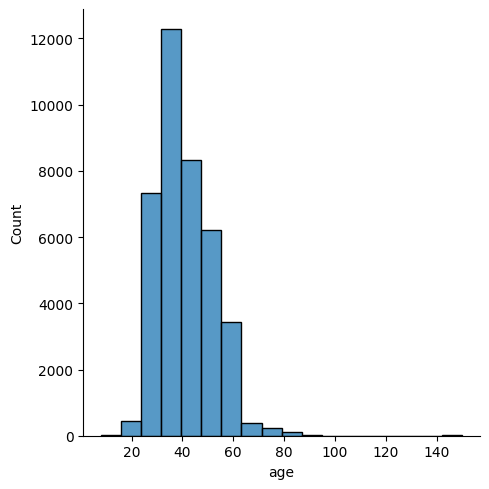

In [52]:
sns.displot(df['age'], bins=18)

Retiraremos os superhumanos com 150 anos, os acima de 80 pela falta de dados e os abaixo de 18 por não fazer sentido para o problema

In [133]:
age_count = df.groupby('age').size().reset_index(name='count')
print(age_count)

      age  count
0     8.0     17
1    18.0     11
2    19.0     28
3    20.0     43
4    21.0     69
..    ...    ...
74   92.0      2
75   93.0      2
76   94.0      1
77   95.0      2
78  150.0     27

[79 rows x 2 columns]


In [22]:
df_clean = df_clean[(df_clean['age'] <= 80) & (df_clean['age'] > 8)]
age_count = df_clean.groupby('age').size().reset_index(name='count')
print(age_count)


     age  count
0   18.0     11
1   19.0     28
2   20.0     43
3   21.0     69
4   22.0    118
..   ...    ...
58  76.0     27
59  77.0     37
60  78.0     28
61  79.0     22
62  80.0     30

[63 rows x 2 columns]


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38671 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        38671 non-null  float64
 1   job        37370 non-null  object 
 2   marital    38580 non-null  object 
 3   education  38671 non-null  object 
 4   default    38671 non-null  int64  
 5   balance    36933 non-null  float64
 6   housing    38671 non-null  int64  
 7   loan       38671 non-null  int64  
 8   contact    37956 non-null  object 
 9   day        38671 non-null  int64  
 10  month      38671 non-null  int64  
 11  duration   38671 non-null  int64  
 12  campaign   37314 non-null  float64
 13  pdays      38671 non-null  int64  
 14  previous   38383 non-null  float64
 15  y          38671 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 5.0+ MB


Visualizar unicos após as alterações

In [39]:
categoricas = df_clean.select_dtypes(include=['object','float64','int64']).columns.tolist()

for col in categoricas:
  print(col)
  print(df_clean[col].unique(), "\n")

age
[41. 42. 26. 54. 43. 34. 40. 45. 51. 21. 32. 60. 47. 46. 31. 53. 27. 29.
 35. 36. 25. 37. 50. 77. 57. 30. 58. 33. 44. 48. 55. 61. 28. 39. 63. 59.
 38. 70. 56. 65. 49. 22. 71. 52. 74. 23. 24. 64. 19. 78. 62. 73. 69. 67.
 66. 80. 68. 72. 76. 75. 20. 79. 18.] 

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' nan 'admin.'
 'unemployed' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

default
[0 1] 

balance
[ 4522.   398.   706. ...  4820. 13851.  4889.] 

housing
[0 1] 

loan
[0 1] 

contact
['cellular' 'unknown' nan 'telephone'] 

day
[28 16  8 19  6 13 31 14  7 18  4 26  3 21  9 20 30  2 29  1 23 12 17 15
 11 10 24 27  5 25 22] 

month
[ 8  5 10 11  7  6  4  1  2  9  3 12] 

duration
[  55  251  118 ... 1489 1167 1070] 

campaign
[ 1.  4.  3.  6.  2. nan  5. 31. 13. 30. 21.  7. 26.  8. 19. 10. 14.  9.
 12. 15. 29. 22. 16. 17. 11. 

# Análise de dados úteis 

Tabela de média de Y por trabalho

In [ ]:
mean_sucesso_trabalho = df_clean.groupby('job')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_trabalho = mean_sucesso_trabalho.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_sucesso_trabalho.index, y=mean_sucesso_trabalho, palette='Set2',)
plt.title('Média de sucesso por trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Média de sucesso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Média de Y por educação

C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\1916903566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_educacao.index, y=mean_sucesso_educacao, palette='Set2')


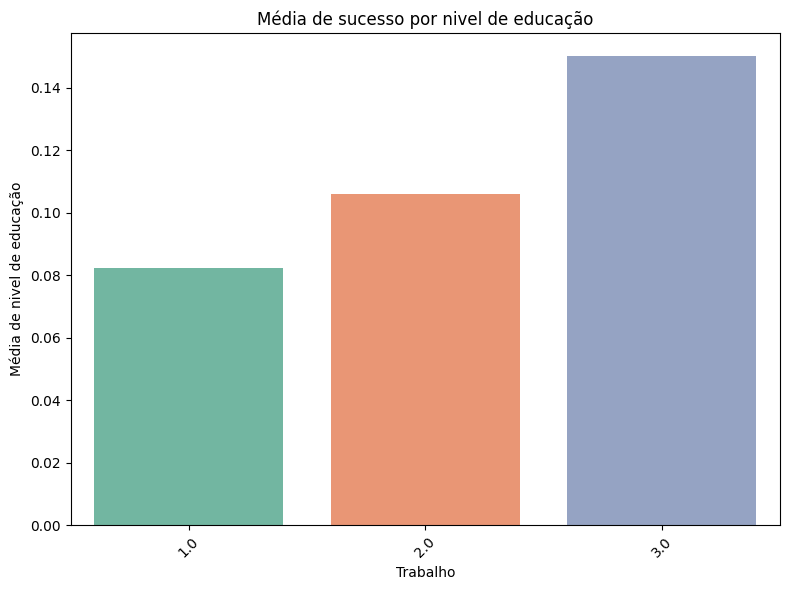

In [68]:
mean_sucesso_educacao = df_clean.groupby('education')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_educacao = mean_sucesso_educacao.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_educacao.index, y=mean_sucesso_educacao, palette='Set2')
plt.title('Média de sucesso por nivel de educação')
plt.xlabel('Trabalho')
plt.ylabel('Média de nivel de educação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Média de Y por idade 

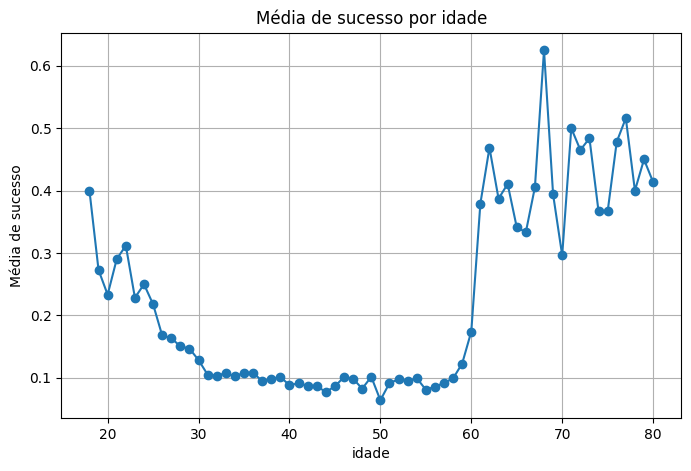

In [53]:
# Agrupar por 'age' e calcular a média de 'y'
age_mean_y = df_clean.groupby('age')['y'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(age_mean_y['age'], age_mean_y['y'], marker='o')
plt.xlabel('idade')
plt.ylabel('Média de sucesso')
plt.title('Média de sucesso por idade')
plt.grid(True)
plt.show()


C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\2720719373.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_estado_civil.index, y=mean_sucesso_estado_civil, palette='Set2')


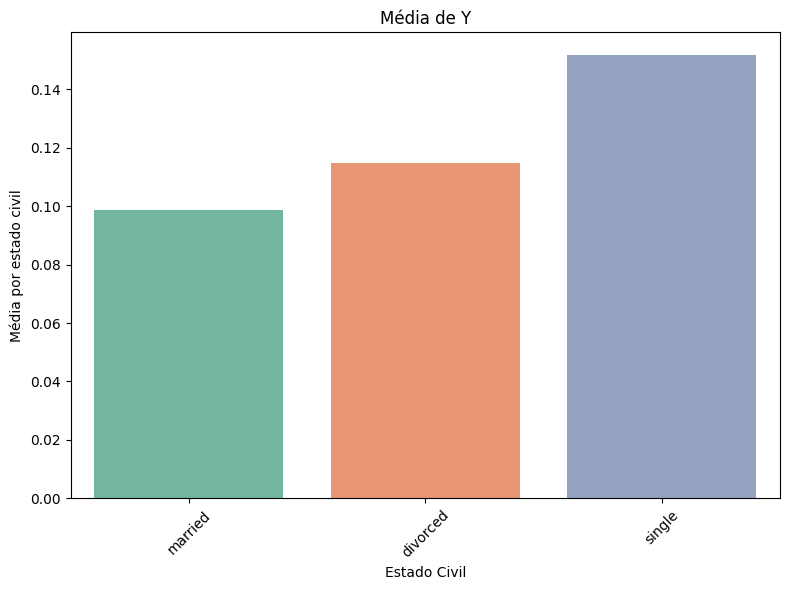

In [74]:
mean_sucesso_estado_civil = df_clean.groupby('marital')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_estado_civil = mean_sucesso_estado_civil.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_estado_civil.index, y=mean_sucesso_estado_civil, palette='Set2')
plt.title('Média de Y')
plt.xlabel('Estado Civil')
plt.ylabel('Média por estado civil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\3893543457.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_default.index, y=mean_sucesso_default, palette='Set2')


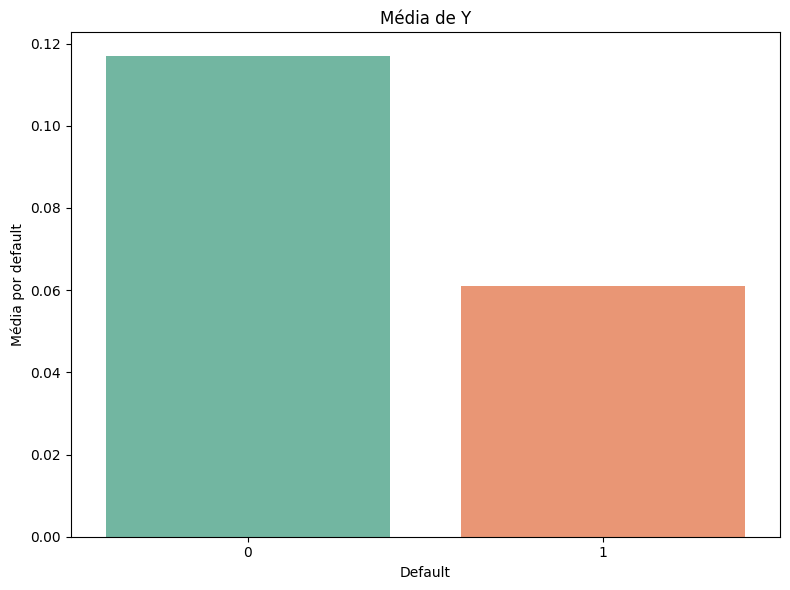

In [76]:
mean_sucesso_default = df_clean.groupby('default')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_default = mean_sucesso_default.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_default.index, y=mean_sucesso_default, palette='Set2')
plt.title('Média de Y')
plt.xlabel('Default')
plt.ylabel('Média por default')
plt.tight_layout()
plt.show()

C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\1626749542.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y_balance.index, y=mean_y_balance, palette='Set2')


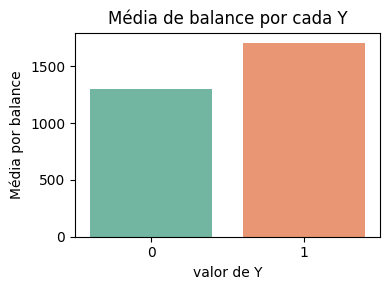

In [83]:
mean_y_balance = df_clean.groupby('y')['balance'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_y_balance = mean_y_balance.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(4, 3))
sns.barplot(x=mean_y_balance.index, y=mean_y_balance, palette='Set2')
plt.title('Média de balance por cada Y')
plt.xlabel('valor de Y')
plt.ylabel('Média por balance')
plt.tight_layout()
plt.show()

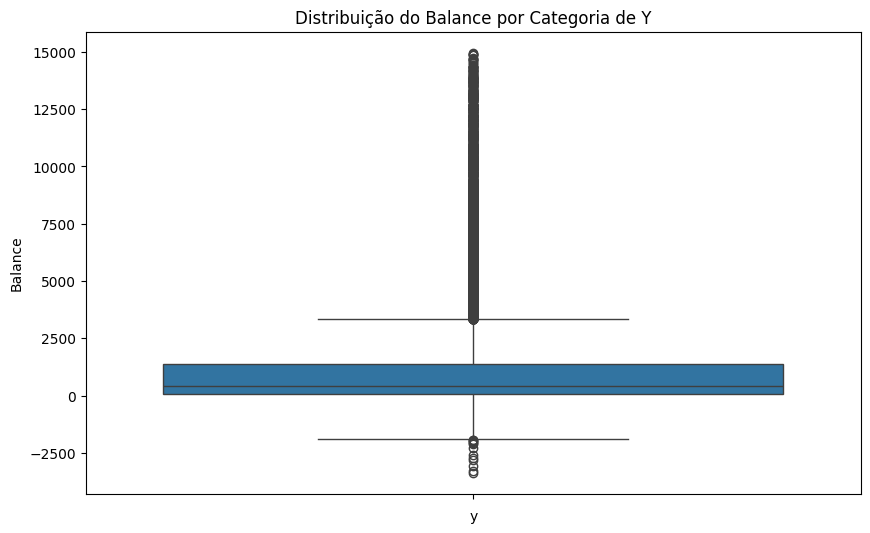

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='balance', data=df_clean)

# Títulos e rótulos
plt.title('Distribuição do Balance por Categoria de Y')
plt.xlabel('y')
plt.ylabel('Balance')

# Exibindo o gráfico
plt.show()

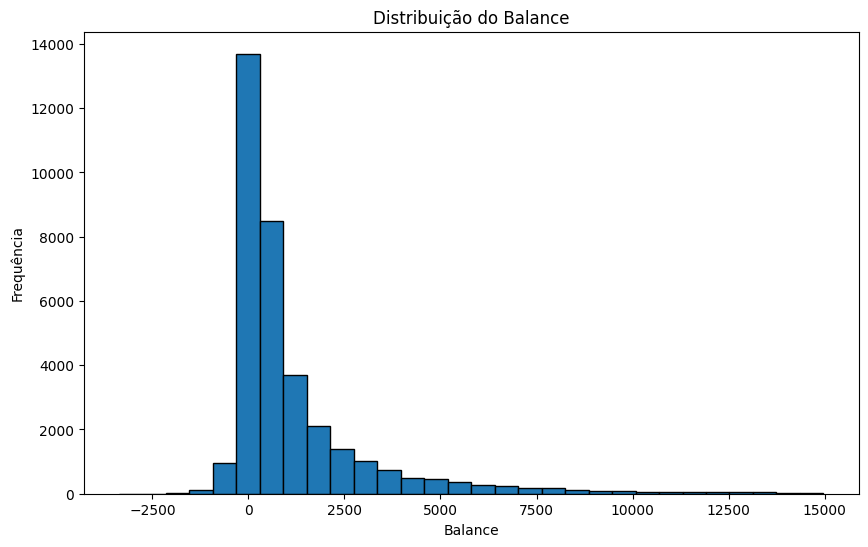

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['balance'], bins=30, edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição do Balance')
plt.xlabel('Balance')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

In [91]:
#Retirando outliers
df_clean= df_clean[(df_clean['balance'] < 15000) & (df_clean['balance'] > -5000) ]

C:\Users\jvmil\AppData\Local\Temp\ipykernel_14260\982123523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y_contact.index, y=mean_y_contact, palette='Set2')


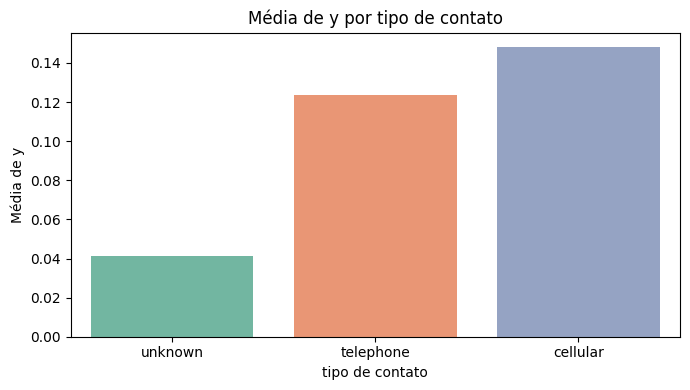

In [97]:
mean_y_contact = df_clean.groupby('contact')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_y_contact = mean_y_contact.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(7, 4))
sns.barplot(x=mean_y_contact.index, y=mean_y_contact, palette='Set2')
plt.title('Média de y por tipo de contato')
plt.xlabel('tipo de contato')
plt.ylabel('Média de y')
plt.tight_layout()
plt.show()